In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('crop_yield.csv')
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [3]:
df.shape

(19689, 10)

In [4]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [6]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [7]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [8]:
df['Season'] = df['Season'].str.strip()
df['Crop'] = df['Crop'].str.strip()
df['State'] = df['State'].str.strip()

In [9]:
# creates a summary table from a dataframe.
# it aggregates data based on 'Crop' and calculates summary statistics using mean for different features in the dataframe.

# select numeric values only 
numeric_df = df.select_dtypes(include=['number'])

# Add the 'Crop' column to the numeric dataframe for grouping
numeric_df['Crop'] = df['Crop']

# Create the pivot table
crop_summary = pd.pivot_table(numeric_df, index=['Crop'], aggfunc='mean')
crop_summary.head()

,Annual_Rainfall,Area,Crop_Year,Fertilizer,Pesticide,Production,Yield
Crop,,,,,,,
Arecanut,2111.847559,54168.721358,2008.345679,7.577416e+06,15135.635893,241631.240741,2.073635
Arhar/Tur,1398.243711,162113.332657,2008.938976,2.206746e+07,44895.768014,119909.120079,0.967348
Bajra,1062.356408,178164.319847,2008.757634,2.299835e+07,47060.740202,225452.379771,2.427462
Banana,1718.129705,29091.945673,2008.432653,4.002412e+06,7823.958111,924375.424490,26.851128
Barley,1169.940152,31212.405354,2008.609428,4.009223e+06,8324.685678,65652.144781,1.595540


In [10]:
crop_summary_new = crop_summary.reset_index()
crop_summary_new.head()

,Crop,Annual_Rainfall,Area,Crop_Year,Fertilizer,Pesticide,Production,Yield
0,Arecanut,2111.847559,54168.721358,2008.345679,7.577416e+06,15135.635893,241631.240741,2.073635
1,Arhar/Tur,1398.243711,162113.332657,2008.938976,2.206746e+07,44895.768014,119909.120079,0.967348
2,Bajra,1062.356408,178164.319847,2008.757634,2.299835e+07,47060.740202,225452.379771,2.427462
3,Banana,1718.129705,29091.945673,2008.432653,4.002412e+06,7823.958111,924375.424490,26.851128
4,Barley,1169.940152,31212.405354,2008.609428,4.009223e+06,8324.685678,65652.144781,1.595540


### Data Visualization

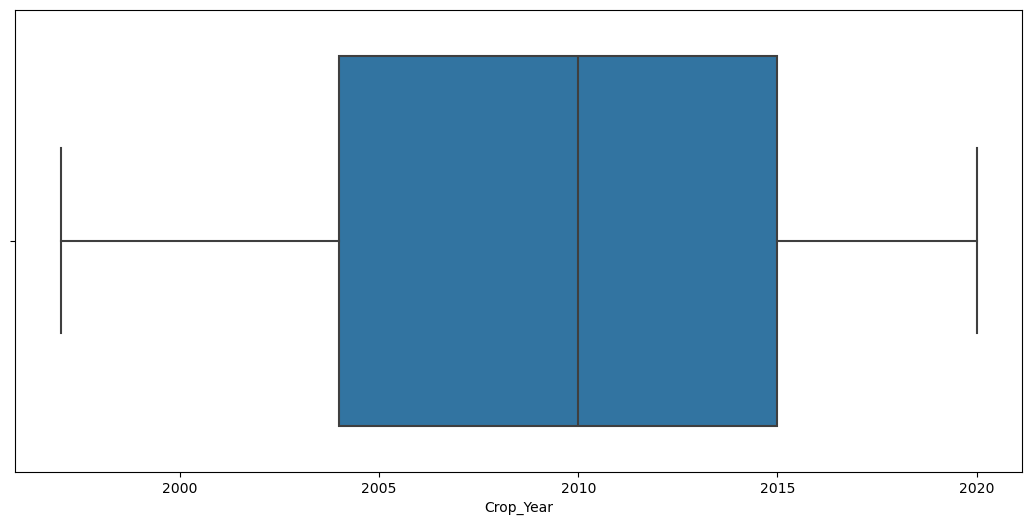

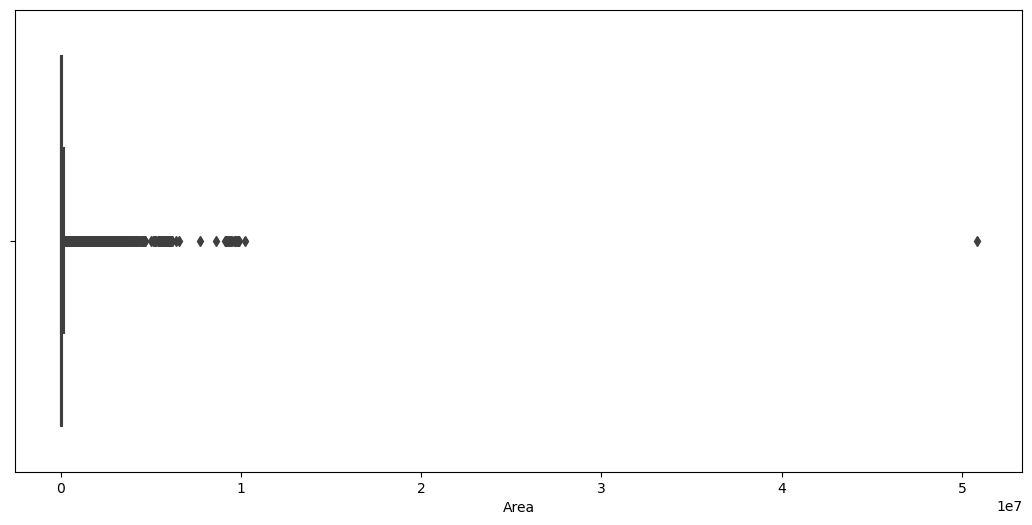

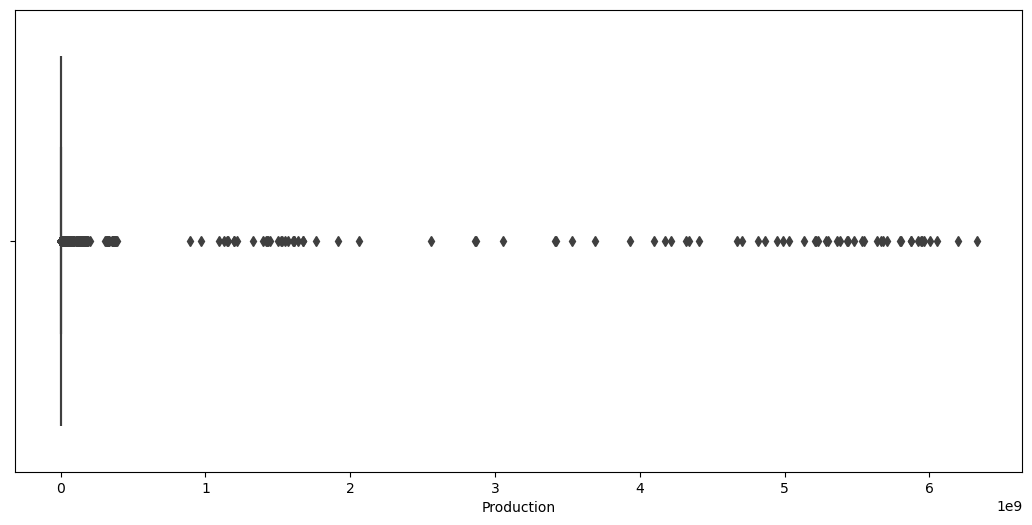

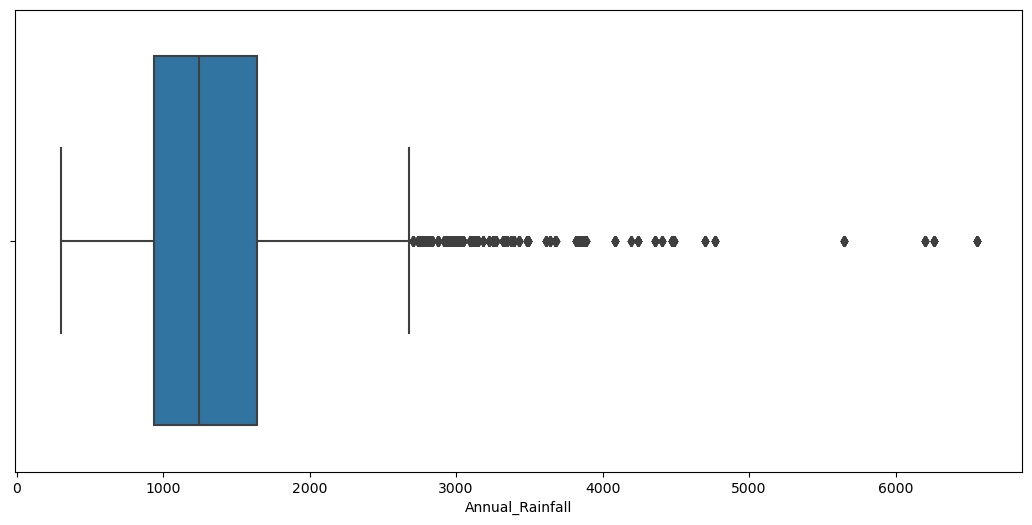

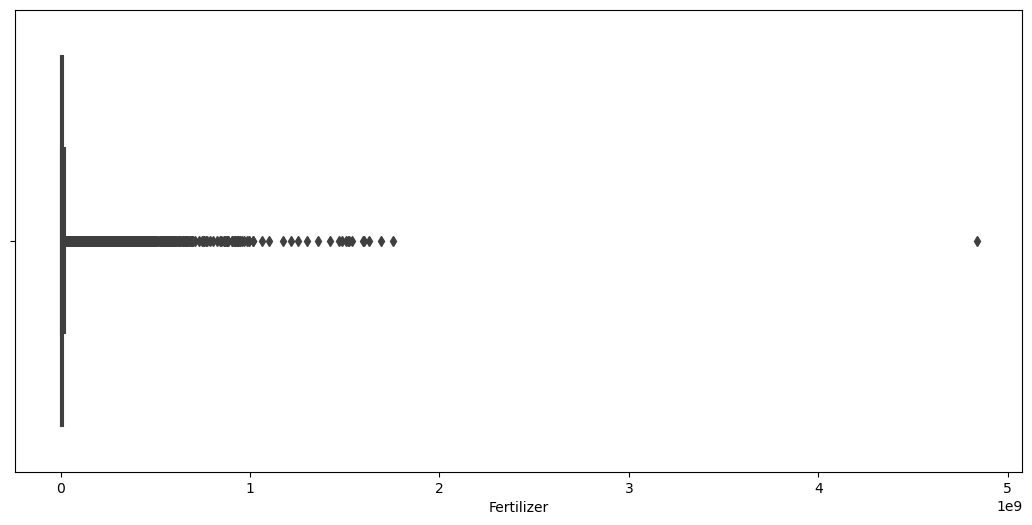

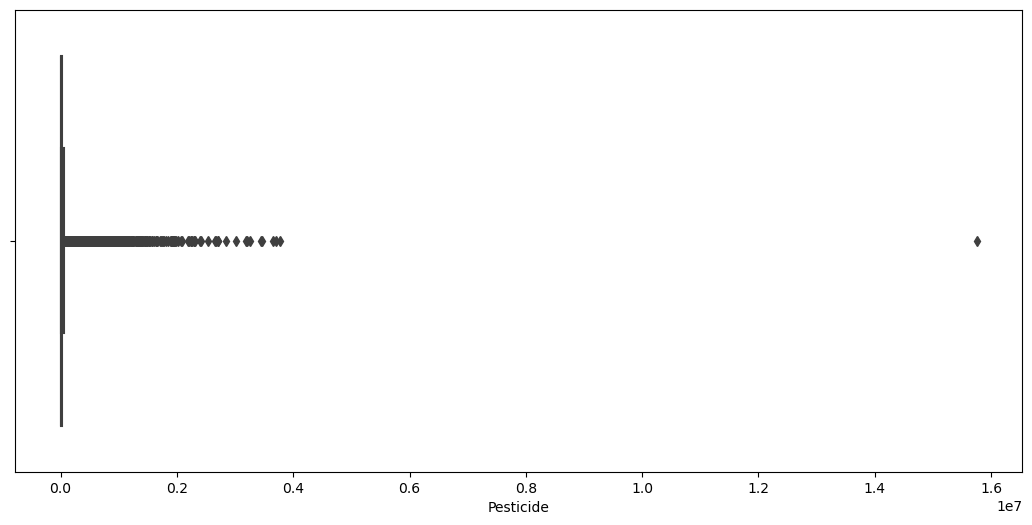

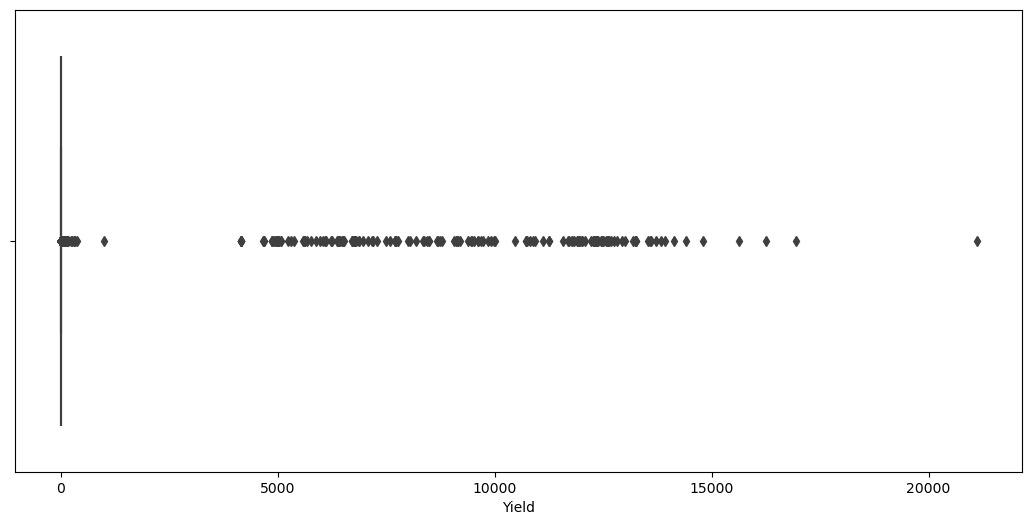

In [11]:
df_num = df[['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']]
for i in df_num.columns:
    plt.figure(figsize = (13, 6))
    sns.boxplot(x = df_num[i])

In [12]:
crop_summary_new.head()

,Crop,Annual_Rainfall,Area,Crop_Year,Fertilizer,Pesticide,Production,Yield
0,Arecanut,2111.847559,54168.721358,2008.345679,7.577416e+06,15135.635893,241631.240741,2.073635
1,Arhar/Tur,1398.243711,162113.332657,2008.938976,2.206746e+07,44895.768014,119909.120079,0.967348
2,Bajra,1062.356408,178164.319847,2008.757634,2.299835e+07,47060.740202,225452.379771,2.427462
3,Banana,1718.129705,29091.945673,2008.432653,4.002412e+06,7823.958111,924375.424490,26.851128
4,Barley,1169.940152,31212.405354,2008.609428,4.009223e+06,8324.685678,65652.144781,1.595540


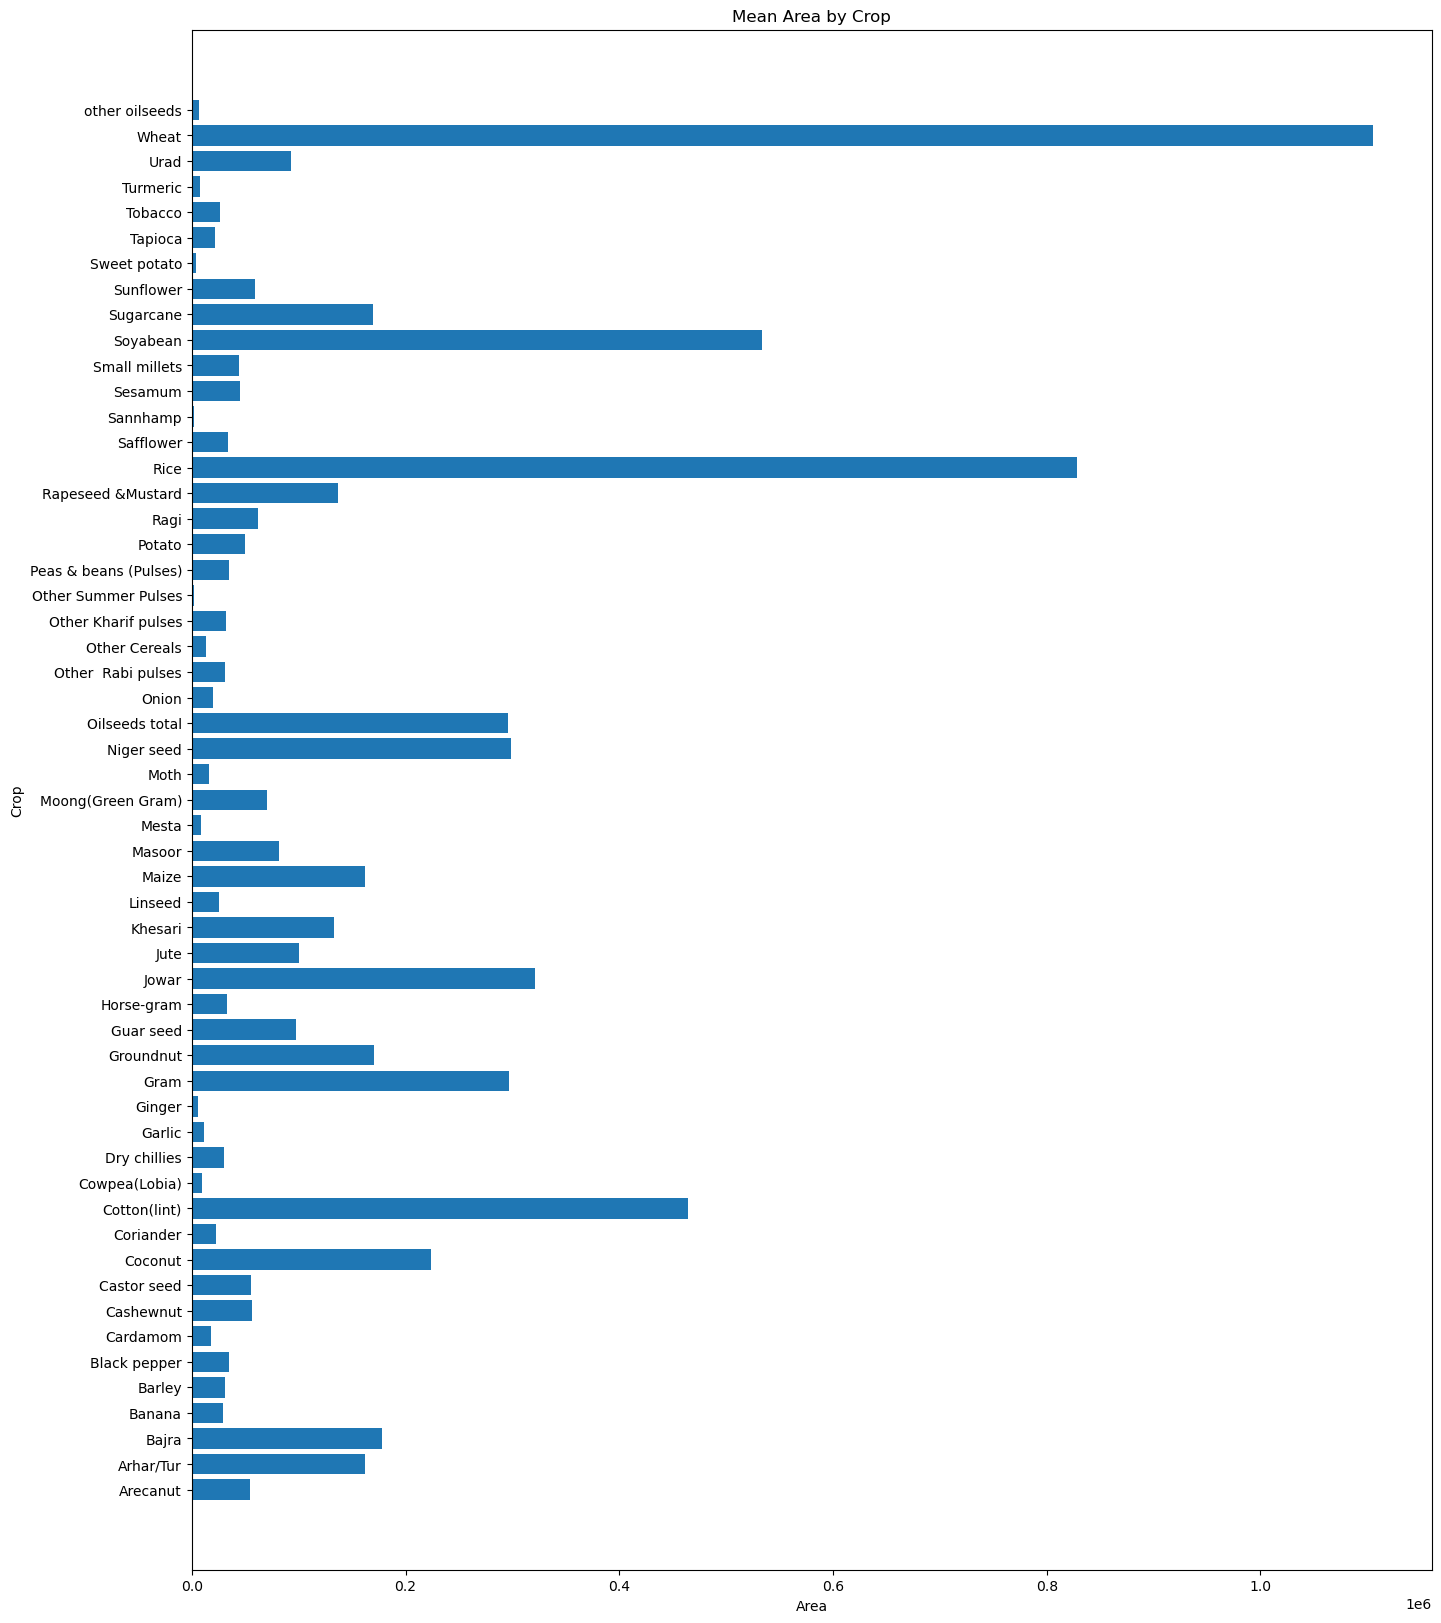

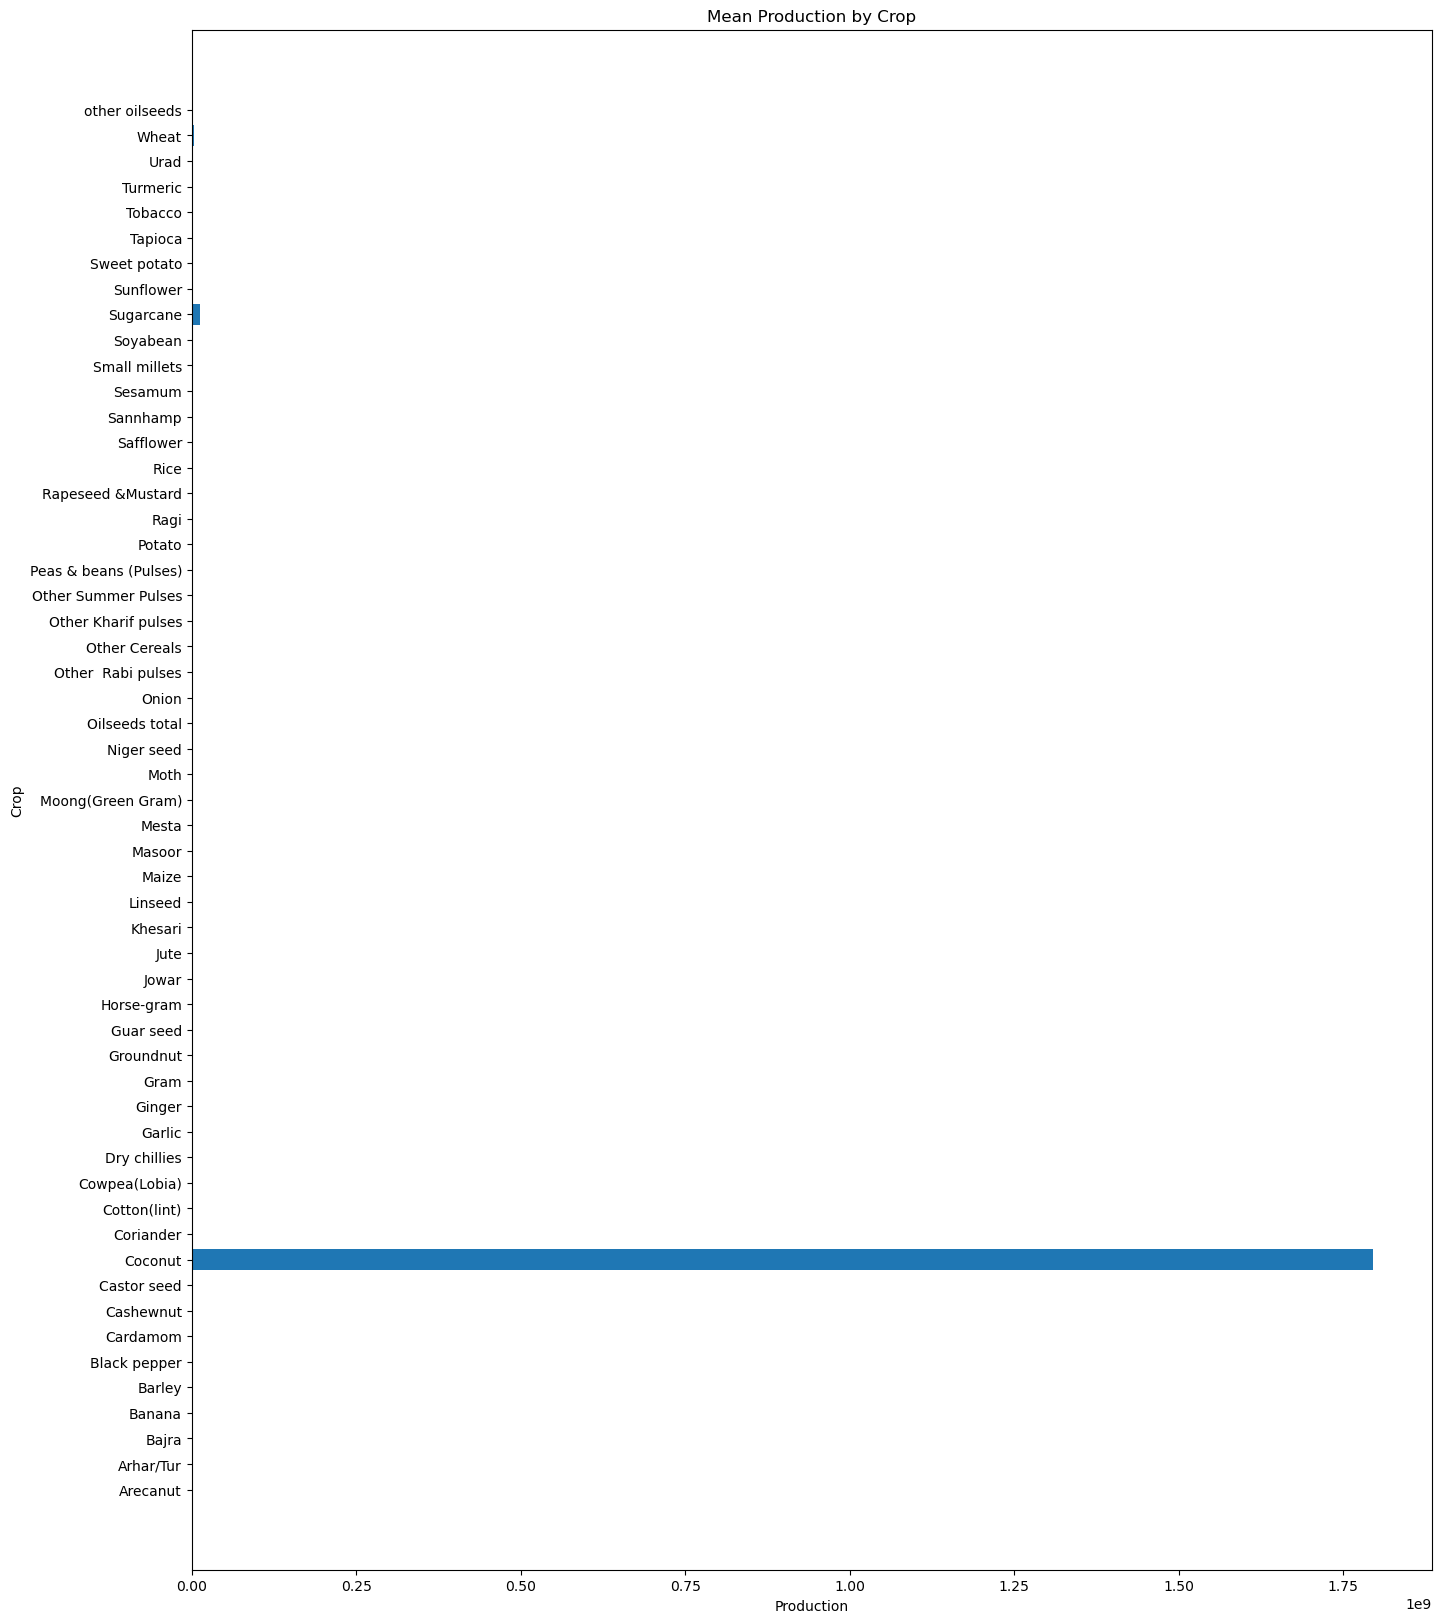

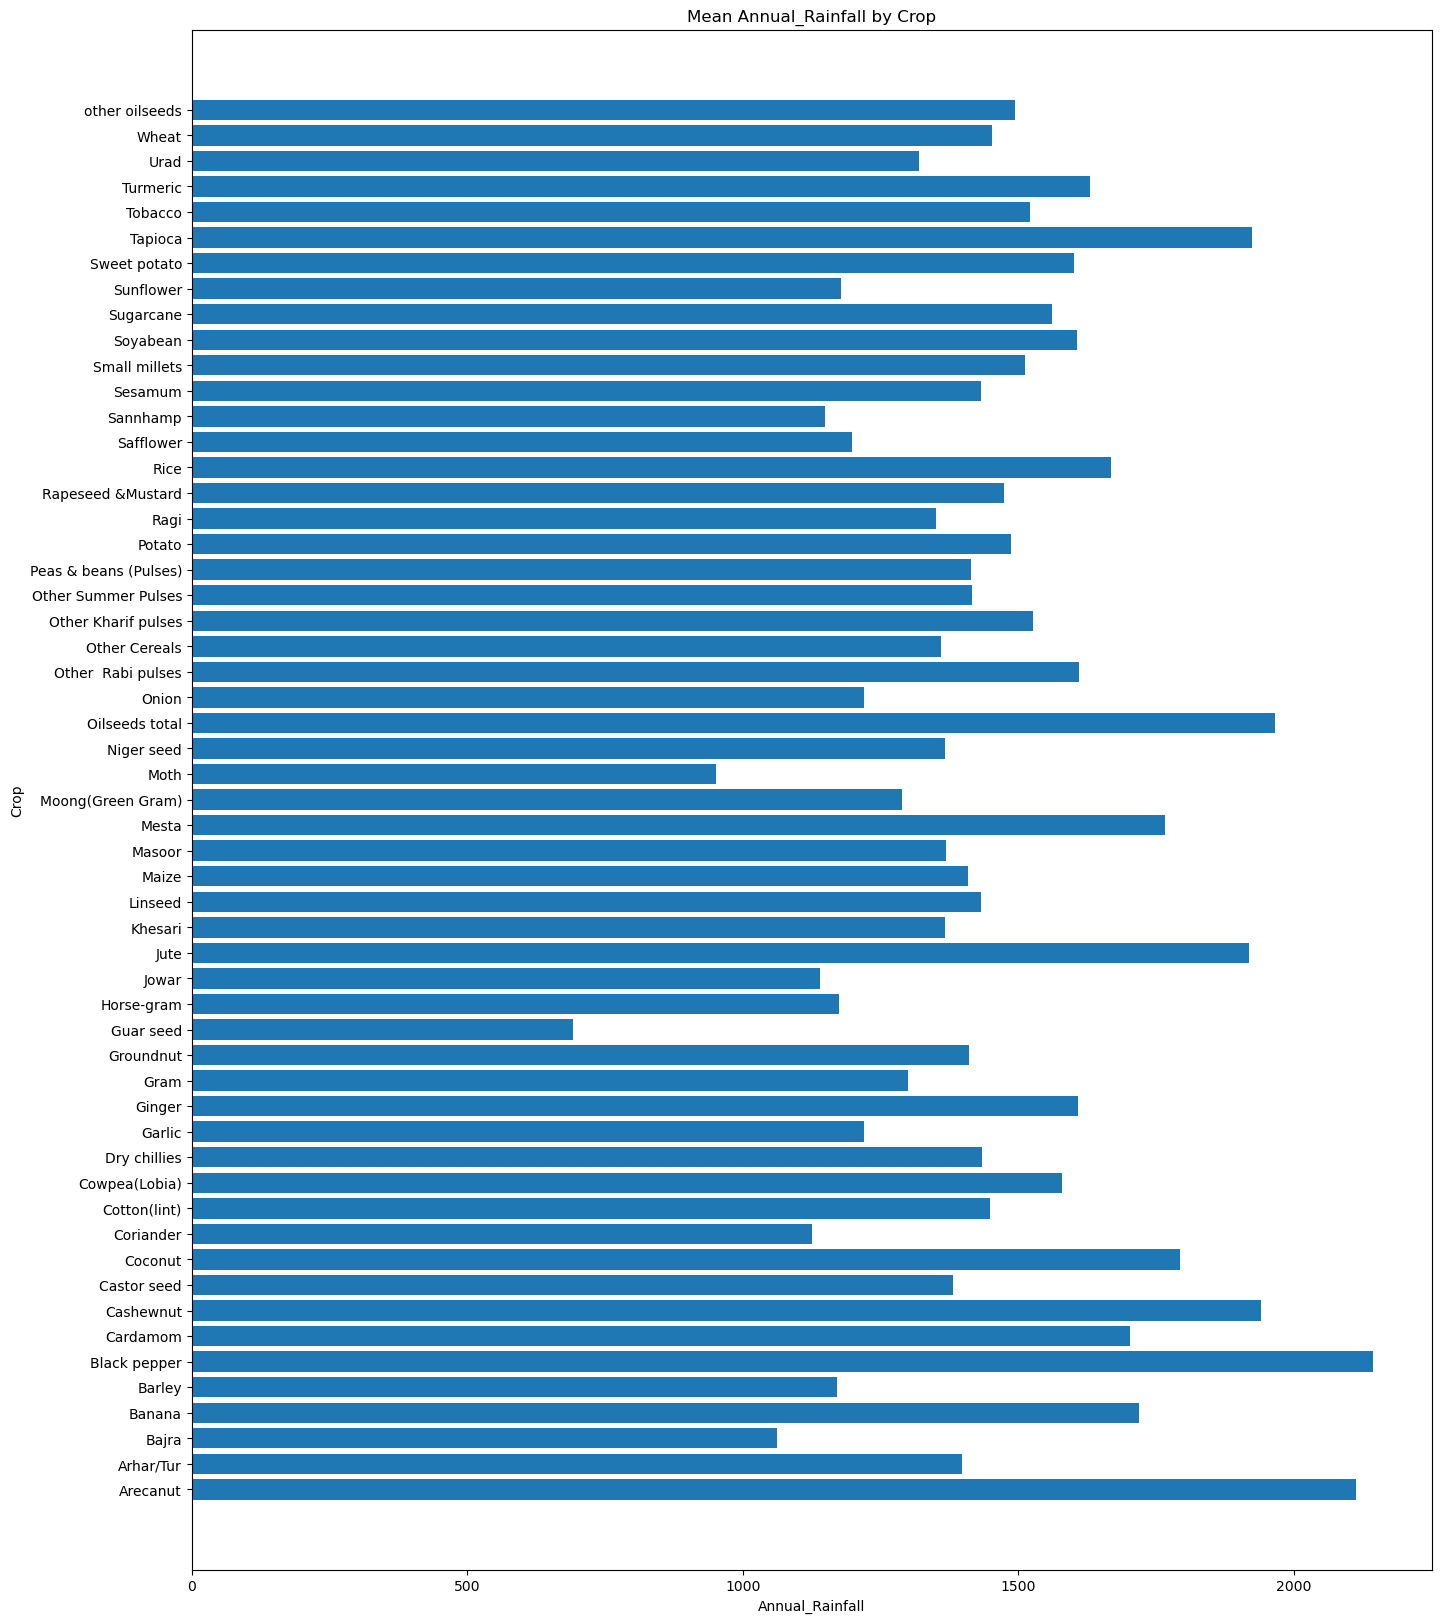

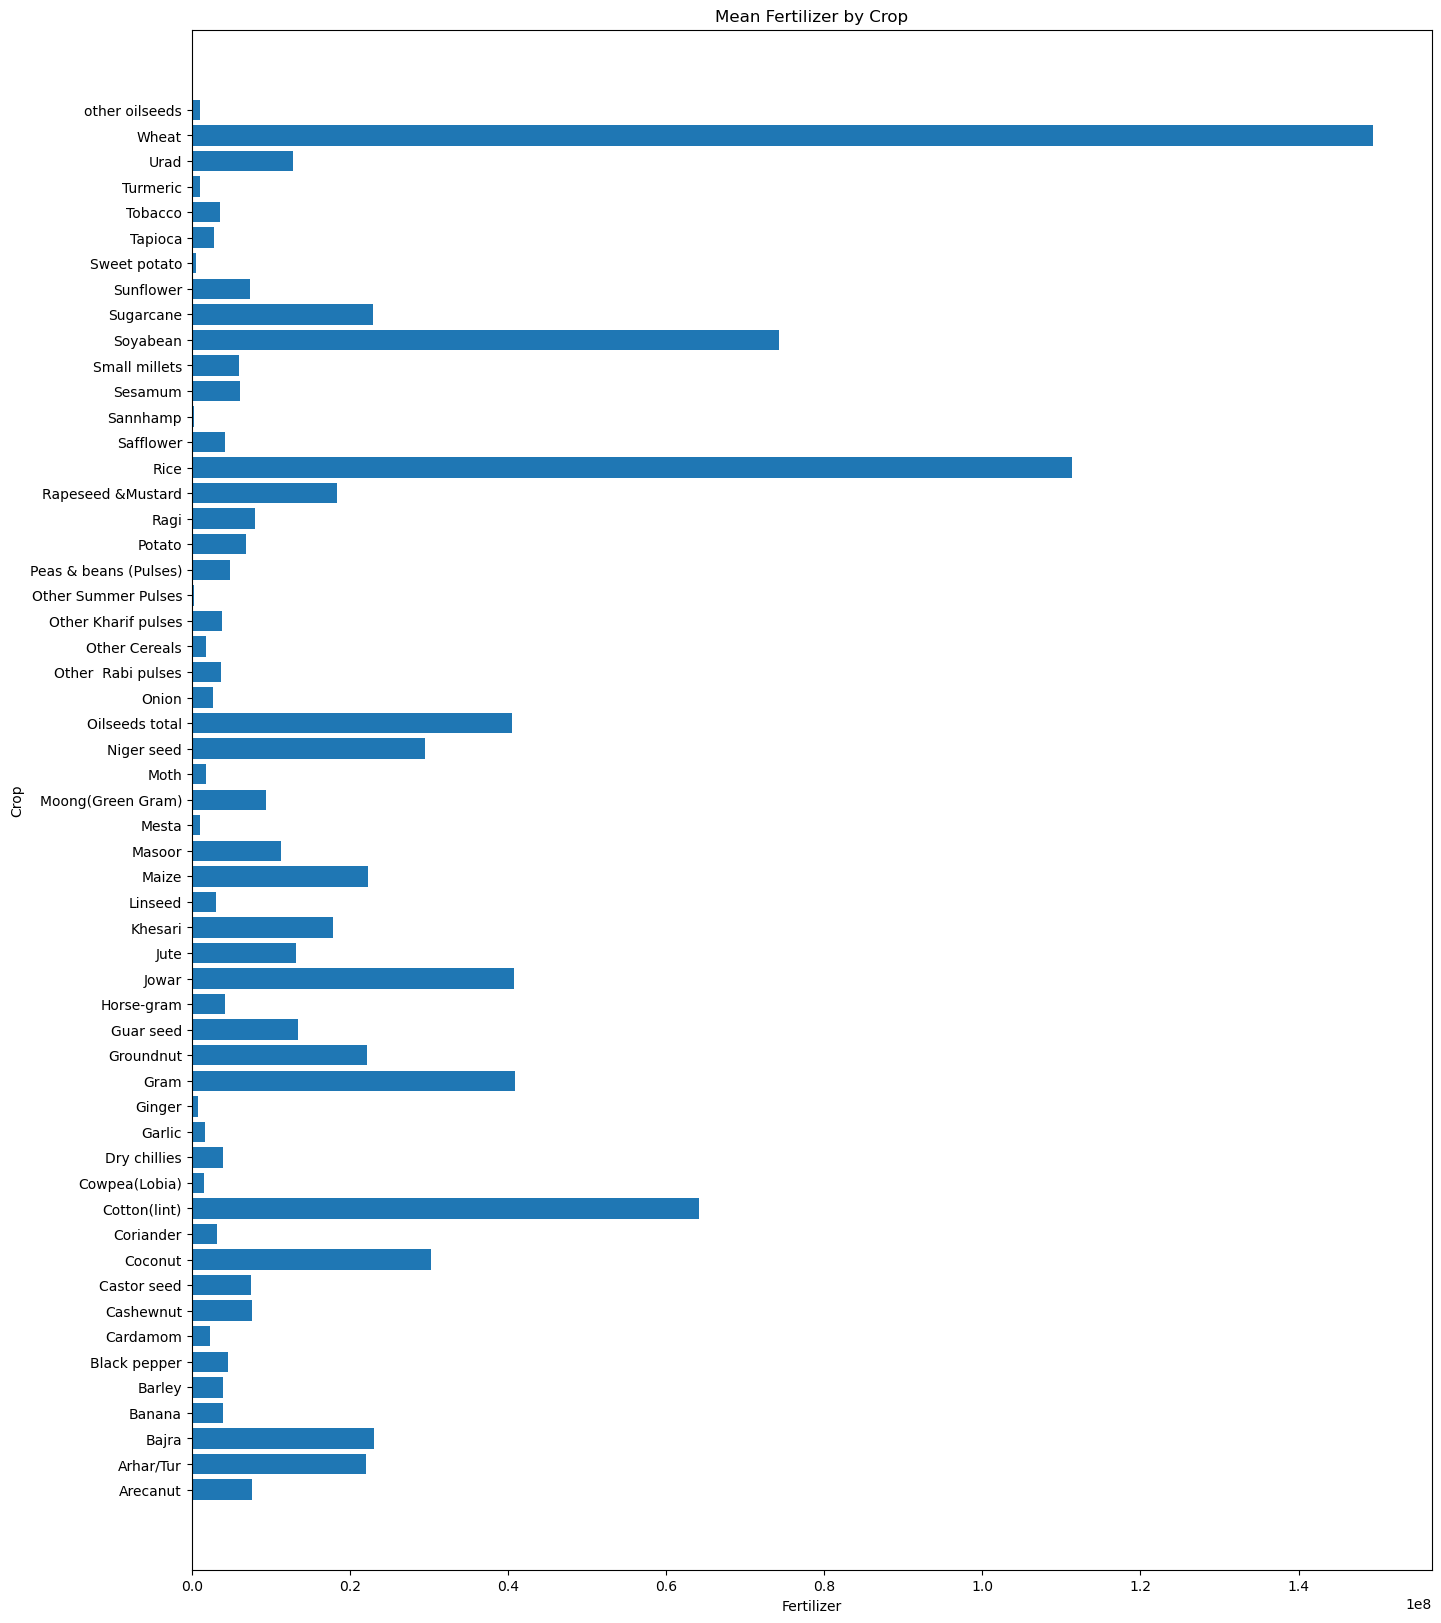

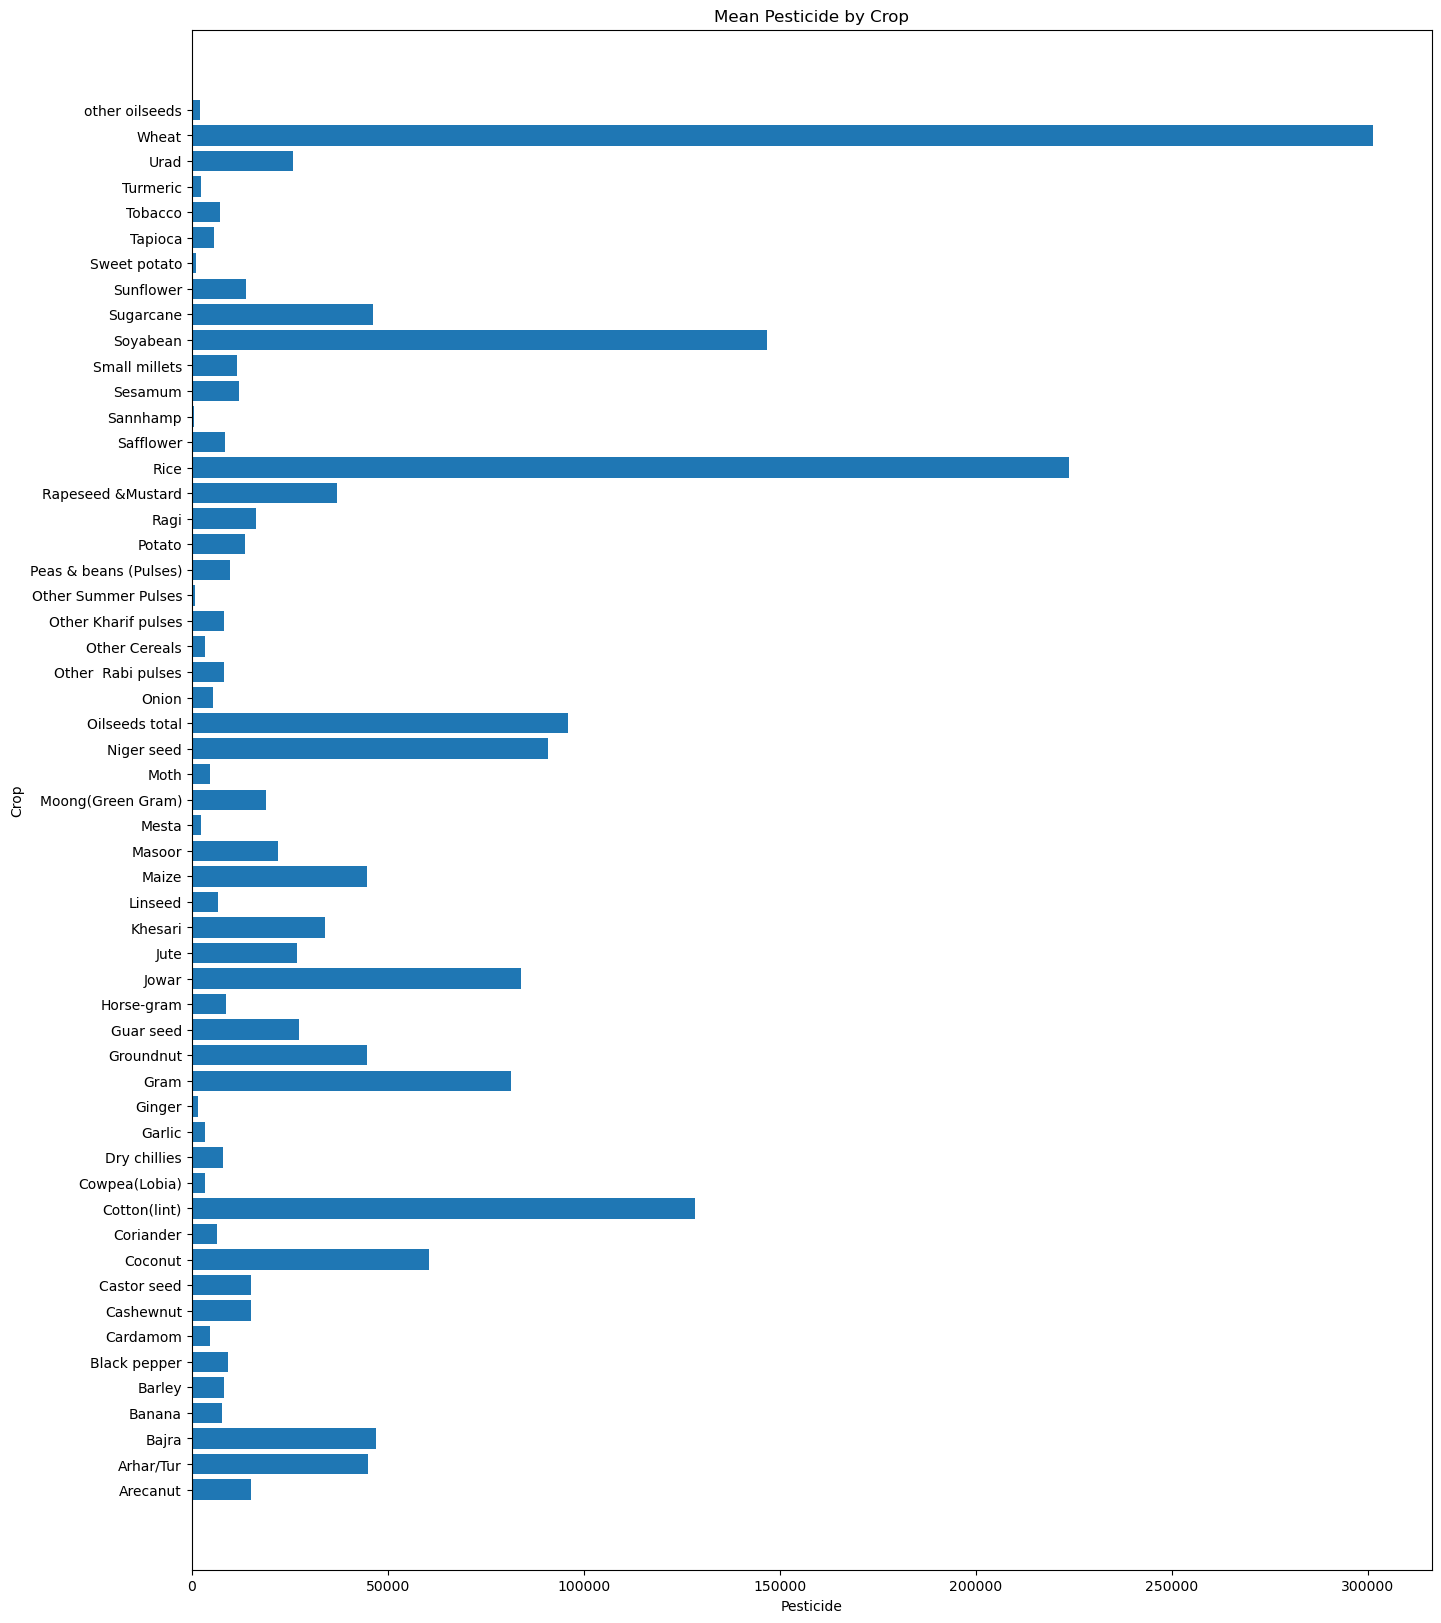

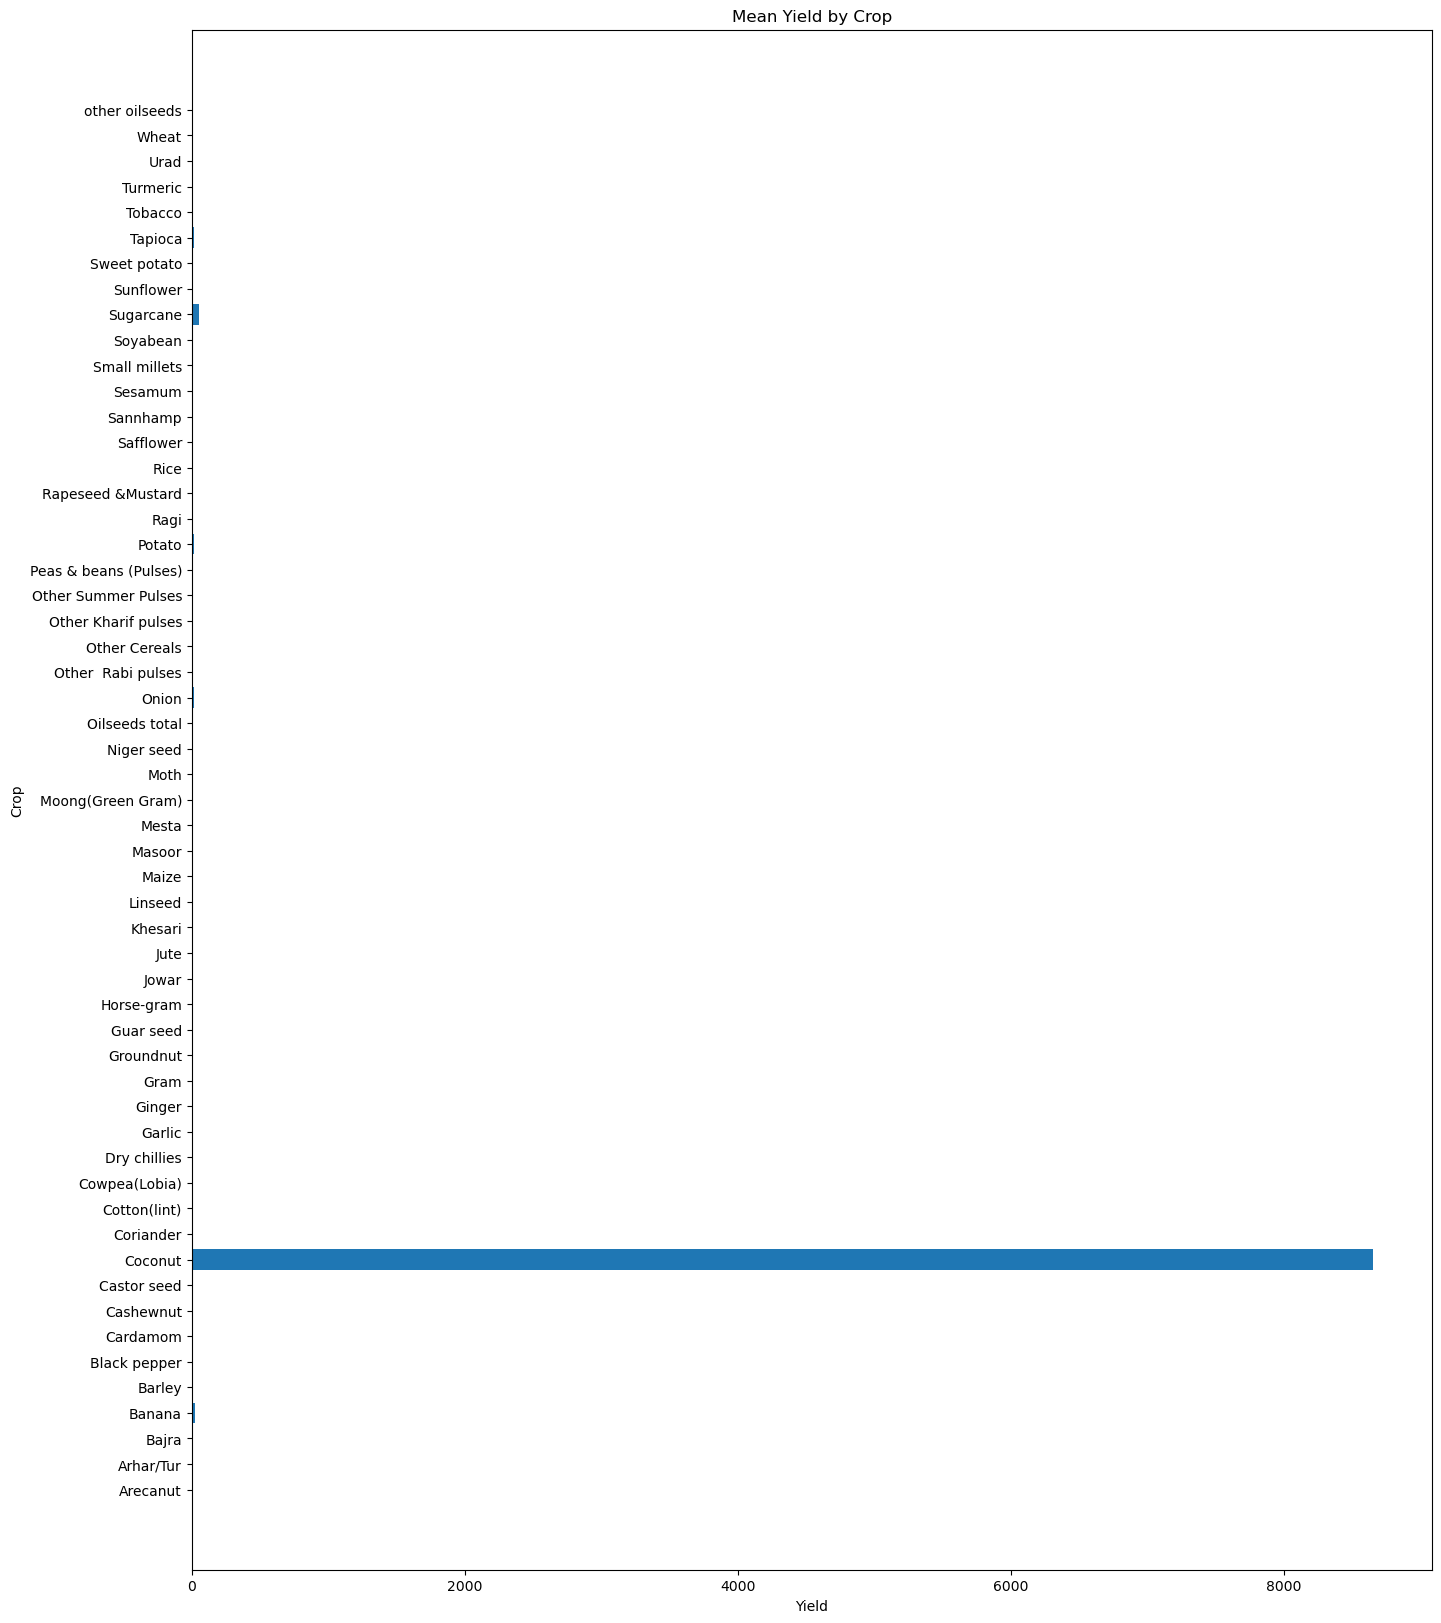

In [13]:
# df_num = df[['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']]


if 'Crop' in crop_summary_new.columns:
    crop_summary_new = crop_summary_new.set_index('Crop')

for i in df_num.columns:
    if i != 'Crop_Year':  # Ensure we don't try to plot the 'Crop_Year' column
        plt.figure(figsize=(16, 20))
        plt.barh(crop_summary_new.index, crop_summary_new[i])  # Correct use of barh
        plt.xlabel(i)
        plt.ylabel('Crop')
        plt.title(f'Mean {i} by Crop')
        plt.show()

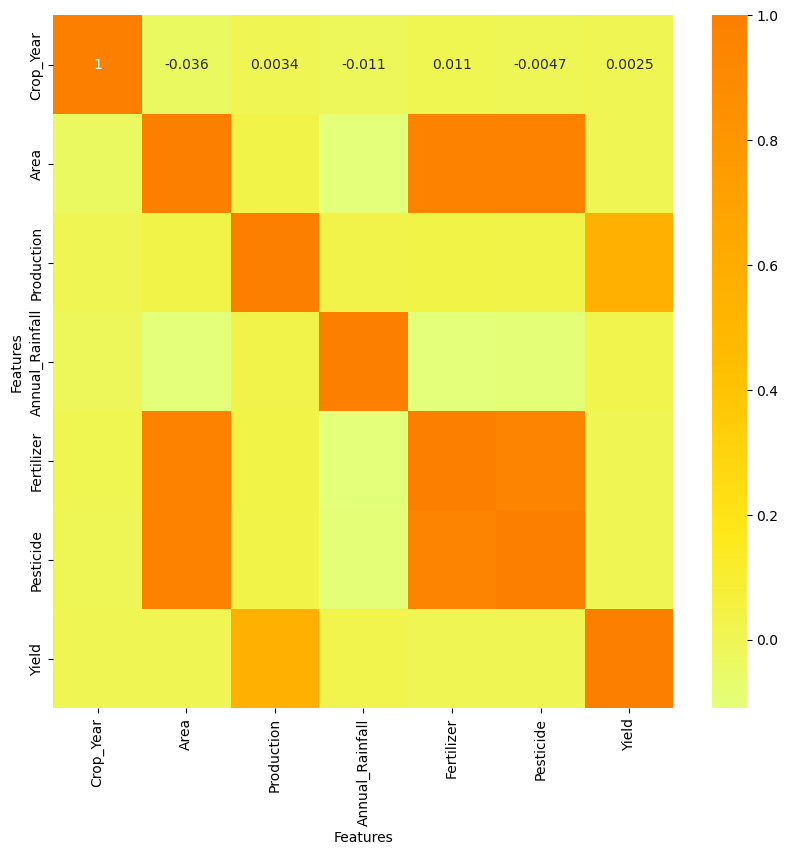

In [14]:
#  Plot heatmap 
# sns.heatmap(df.corr(), annot = True, cmap="YlGnBu_r")
df_num.corr()

fig, ax = plt.subplots(1, 1, figsize = (10, 9))
sns.heatmap(df_num.corr(), annot = True, cmap='Wistia');

ax.set(xlabel = 'Features')
ax.set(ylabel = 'Features')
plt.show()

### Data-Preprcessing

In [15]:
df.head(2)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435


In [16]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [17]:
col = ['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Production', 'Crop_Year', 'State', 'Crop', 'Season', 'Yield']
df = df[col]
df.head()

,Area,Annual_Rainfall,Fertilizer,Pesticide,Production,Crop_Year,State,Crop,Season,Yield
0,73814.0,2051.4,7024878.38,22882.34,56708,1997,Assam,Arecanut,Whole Year,0.796087
1,6637.0,2051.4,631643.29,2057.47,4685,1997,Assam,Arhar/Tur,Kharif,0.710435
2,796.0,2051.4,75755.32,246.76,22,1997,Assam,Castor seed,Kharif,0.238333
3,19656.0,2051.4,1870661.52,6093.36,126905000,1997,Assam,Coconut,Whole Year,5238.051739
4,1739.0,2051.4,165500.63,539.09,794,1997,Assam,Cotton(lint),Kharif,0.420909


In [18]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Yield', axis = 1), df['Yield'])
x_train.head()

,Area,Annual_Rainfall,Fertilizer,Pesticide,Production,Crop_Year,State,Crop,Season
14211,9104.0,874.0,1437612.64,3004.32,15805,2015,Bihar,Tobacco,Whole Year
11639,413677.0,856.3,68715886.47,99282.48,585767,2010,Madhya Pradesh,Jowar,Kharif
4847,882.0,2296.8,135166.50,308.70,427,2016,Assam,Cotton(lint),Kharif
10809,1260.0,1540.9,180230.40,113.40,880,2008,Nagaland,Masoor,Rabi
13940,420000.0,382.7,63403200.00,138600.00,1342000,2014,Punjab,Cotton(lint),Kharif


In [19]:
# # Crop, Season, State labeling
# from sklearn.preprocessinag import LabelEncoder 
# crop_label = LabelEncoder()
# state_label = LabelEncoder()
# season_label = LabelEncoder()

# def labelEncoding():
#     df['Crop'] = crop_label.fit_transform(df['Crop'])
#     df['Season'] = state_label.fit_transform(df['Season']) 
#     df['State'] = season_label.fit_transform(df['State'])
# labelEncoding()
# df.head()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder()
scale = StandardScaler()

preprocesser = ColumnTransformer(
    transformers = [
        ('StandardScaler', scale, [0, 1, 2, 3, 4]),
        ('OneHotEncoder', ohe, [5, 6, 7, 8])
    ],
    remainder = 'passthrough'
)

In [20]:
# preprocessor.fit_transform(df)
# preprocessor.fit_transform(x_test)

x_train_dummy = preprocesser.fit_transform(x_train)
x_test_dummy  = preprocesser.fit_transform(x_test)

In [21]:
# preprocessor.get_feature_names_out(input_features=df.columns)
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScaler__Area', 'StandardScaler__Annual_Rainfall',
       'StandardScaler__Fertilizer', 'StandardScaler__Pesticide',
       'StandardScaler__Production', 'OneHotEncoder__Crop_Year_1997',
       'OneHotEncoder__Crop_Year_1998', 'OneHotEncoder__Crop_Year_1999',
       'OneHotEncoder__Crop_Year_2000', 'OneHotEncoder__Crop_Year_2001',
       'OneHotEncoder__Crop_Year_2002', 'OneHotEncoder__Crop_Year_2003',
       'OneHotEncoder__Crop_Year_2004', 'OneHotEncoder__Crop_Year_2005',
       'OneHotEncoder__Crop_Year_2006', 'OneHotEncoder__Crop_Year_2007',
       'OneHotEncoder__Crop_Year_2008', 'OneHotEncoder__Crop_Year_2009',
       'OneHotEncoder__Crop_Year_2010', 'OneHotEncoder__Crop_Year_2011',
       'OneHotEncoder__Crop_Year_2012', 'OneHotEncoder__Crop_Year_2013',
       'OneHotEncoder__Crop_Year_2014', 'OneHotEncoder__Crop_Year_2015',
       'OneHotEncoder__Crop_Year_2016', 'OneHotEncoder__Crop_Year_2017',
       'OneHotEncoder__Crop_Year_2018', 'OneHotEncoder__Crop_Year_20

In [22]:
# preprocessor.get_feature_names_out(input_features=df.columns)

In [23]:
# skew
# df.skew()

In [24]:
# # As the column Area and Production are skewed(imbalance) then we have to fix it for better accuracy
# # To decrease the skewed value we use log
# df_trans['Area'] = np.sqrt(df_trans['Area'])
# df_trans['Production'] = np.sqrt(df_trans['Production'])
# df_trans['Annual_Rainfall'] = np.sqrt(df_trans['Annual_Rainfall'])
# df_trans['Fertilizer'] = np.sqrt(df_trans['Fertilizer'])
# df_trans['Pesticide'] = np.sqrt(df_trans['Pesticide'])
# df_trans['Yield'] = np.sqrt(df_trans['Yield'])

# df_trans.skew()

In [25]:
# from sklearn.preprocessing import PowerTransformer

# # Columns that are still highly skewed
# columns_to_transform = ['Area', 'Fertilizer', 'Pesticide']

# # Applying Yeo-Johnson transformation
# pt = PowerTransformer(method='yeo-johnson')

# df[columns_to_transform] = pt.fit_transform(df[columns_to_transform])

# # Checking skewness again
# skewness = df.skew()
# print(skewness)
# # 

### Split train, test data

In [26]:
# x_train, x_test, y_train, y_test = train_test_split(df.drop('Yield', axis = 1), df['Yield'])
# x_train.head()

### Evaluating different ML models

In [27]:
# models = {
#     'linear_mod': LinearRegression(),
#     'dec_tree_mod': DecisionTreeRegressor(),
#     'knn_mod': KNeighborsRegressor(),
#     'rand_for_mod': RandomForestRegressor(),
#     'svr_mod': SVR()
# }


# for mod_name, model in models.items():
#     model.fit(x_train_dummy, y_train)
#     y_pred = model.predict(x_test_dummy)

#     print(f'{mod_name} MSE: {mean_squared_error(y_test, y_pred)} Score: {r2_score(y_test, y_pred)}')


In [28]:
# dec_tree_mod = DecisionTreeRegressor()
# dec_tree_mod.fit(x_train_dummy, y_train)
# dec_tree_mod.predict(x_test_dummy)

In [29]:
rand_for_mod = RandomForestRegressor()
rand_for_mod.fit(x_train_dummy, y_train)
rand_for_mod.predict(x_test_dummy)

array([20.76467961, 23.61268614, 20.74536801, ..., 20.68199595,
       12.64139563, 27.85222847])

In [30]:
rand_for_mod.score(x_test_dummy, y_test)

0.9645920833076562

In [31]:
df.head(3)

,Area,Annual_Rainfall,Fertilizer,Pesticide,Production,Crop_Year,State,Crop,Season,Yield
0,73814.0,2051.4,7024878.38,22882.34,56708,1997,Assam,Arecanut,Whole Year,0.796087
1,6637.0,2051.4,631643.29,2057.47,4685,1997,Assam,Arhar/Tur,Kharif,0.710435
2,796.0,2051.4,75755.32,246.76,22,1997,Assam,Castor seed,Kharif,0.238333


In [32]:

# # Global encoders (fit on the entire dataset initially)
# crop_label = LabelEncoder()
# state_label = LabelEncoder()
# season_label = LabelEncoder()

# def fit_encoders(df):
#     global crop_label, state_label, season_label
#     crop_label.fit(df['Crop'])
#     state_label.fit(df['State'])
#     season_label.fit(df['Season'])

# def transform_features(crop, season, state):
#     crop_encoded = crop_label.transform([crop])[0]
#     season_encoded = season_label.transform([season])[0]
#     state_encoded = state_label.transform([state])[0]
#     return crop_encoded, season_encoded, state_encoded

# # Apply to the DataFrame initially
# def labelEncoding(df):
#     df['Crop'] = crop_label.transform(df['Crop'])
#     df['Season'] = season_label.transform(df['Season'])
#     df['State'] = state_label.transform(df['State'])
#     return df


In [33]:
# def transform_features(crop, season, state):
#     crop_encoded = crop_label.transform([crop])[0]
#     season_encoded = season_label.transform([season])[0]
#     state_encoded = state_label.transform([state])[0]
#     return crop_encoded, season_encoded, state_encoded

In [34]:
df.columns

Index(['Area', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Production',
       'Crop_Year', 'State', 'Crop', 'Season', 'Yield'],
      dtype='object')

#### Prediction system

In [35]:
# def prediction(Area, Annual_Rainfall, Fertilizer, Pesticide, Production, Crop_Year, State, Crop, Season):
#     features = np.array([[Area, Annual_Rainfall, Fertilizer, Pesticide, Production, Crop_Year, State, Crop, Season]], dtype = object)
#     transformed_features = preprocesser.transform(features)
#     predict_yield = rand_for_mod.predict(transformed_features).reshape(-1, 1)
#     return predict_yield

In [36]:

# def prediction(Crop, Crop_Year, Season, State, Area, Production, Annual_Rainfall, Fertilizer, Pesticide):
#     # Transform categorical features
#     # crop_encoded, season_encoded, state_encoded = transform_features(Crop, Season, State)

#     crop_encoded = crop_label.transform([Crop])[0]
#     season_encoded = season_label.transform([Season])[0]
#     state_encoded = state_label.transform([sta])[0]
    
#     # Create feature array
#     trans_feature = np.array([crop_encoded, Crop_Year, season_encoded, state_encoded, Area, Production, Annual_Rainfall, Fertilizer, Pesticide])
    
#     # Reshape for model prediction
#     trans_feature = trans_feature.reshape(1, -1)
    
#     # Predict
#     prediction_result = rand_for_mod.predict(trans_feature)
#     return prediction_result


# result = prediction('Coconut', 2020, 'Kharif', 'Maharashtra', 12000, 23000, 50.232, 0.56, 0.265)
# print(result)


In [37]:
# from sklearn.preprocessing import LabelEncoder

# # Global encoders (fit on the entire dataset initially)
# crop_label = LabelEncoder()
# state_label = LabelEncoder()
# season_label = LabelEncoder()

# def fit_encoders(df):
#     global crop_label, state_label, season_label
#     crop_label.fit(df['Crop'])
#     state_label.fit(df['State'])
#     season_label.fit(df['Season'])

# def transform_features(crop, season, state):
#     crop_encoded = crop_label.transform([crop])[0]
#     season_encoded = season_label.transform([season])[0]
#     state_encoded = state_label.transform([state])[0]
#     return crop_encoded, season_encoded, state_encoded

# # Apply to the DataFrame initially
# def labelEncoding(df):
#     df['Crop'] = crop_label.transform(df['Crop'])
#     df['Season'] = season_label.transform(df['Season'])
#     df['State'] = state_label.transform(df['State'])
#     return df


In [38]:
df.head()

,Area,Annual_Rainfall,Fertilizer,Pesticide,Production,Crop_Year,State,Crop,Season,Yield
0,73814.0,2051.4,7024878.38,22882.34,56708,1997,Assam,Arecanut,Whole Year,0.796087
1,6637.0,2051.4,631643.29,2057.47,4685,1997,Assam,Arhar/Tur,Kharif,0.710435
2,796.0,2051.4,75755.32,246.76,22,1997,Assam,Castor seed,Kharif,0.238333
3,19656.0,2051.4,1870661.52,6093.36,126905000,1997,Assam,Coconut,Whole Year,5238.051739
4,1739.0,2051.4,165500.63,539.09,794,1997,Assam,Cotton(lint),Kharif,0.420909


In [39]:
def prediction(Area, Annual_Rainfall, Fertilizer, Pesticide, Production, Crop_Year, State, Crop, Season):
    features = np.array([[Area, Annual_Rainfall, Fertilizer, Pesticide, Production, Crop_Year, State, Crop, Season]], dtype = object)
    transformed_features = preprocesser.transform(features)
    predict_yield = rand_for_mod.predict(transformed_features).reshape(-1, 1)
    return predict_yield

Arecanut	1997	Whole Year	Assam	73814.0	56708	2051.4	7024878.38	22882.34	0.796087
1	Arhar/Tur	1997	Kharif	Assam	6637.0	4685	2051.4	631643.29	2057.47	0.710435
2	Castor seed	1997	Kharif	Assam	796.0	22	2051.4	75755.32	246.76	0.238333
3	Coconut	1997	Whole Year	Assam	19656.0	126905000	2051.4	1870661.52	6093.36	5238.051739
4	Cotton(lint)	1997	Kharif	Assam	1739.0	794	2051.4	165500.63	539.09	0.420909

#### Testing the model on new input data
##### Assume: Crop = Coconut, Crop_Year = 2020, Season = Kharif, State = Maharashtra, Area = 12000.2 sqmt, Production = 23000, Annual_Rainfall = 50.232, Fertilizer = 0.56, Pesticide = 0.265, Then find the Yield for the Crop


In [40]:
result = prediction(12000.2, 50.232, 0.56, 0.265, 23000, 2020, 'Maharashtra', 'Coconut', 'Kharif')
print(result)

# prediction('Coconut', 2020, 'Kharif', 'Maharashtra', 12000, 23000, 50.232, 0.56, 0.265)

# Fit encoders on the DataFrame
# fit_encoders(df)

# # Encode the DataFrame
# df = labelEncoding(df)

# Example usage with sample input


[[8164.20952871]]


In [41]:
import pickle
pickle.dump(rand_for_mod, open("model.pkl","wb"))
pickle.dump(preprocesser, open("preprocesser.pkl","wb"))